In [15]:
import json
SETUP_PATH = 'setup.json'
f = open(SETUP_PATH)
data = json.load(f)

## Run k6 test script

In [16]:
import os
import shutil
from datetime import datetime

# prepare directory structure
if not os.path.exists(data["test_result_base_dir"]):
    os.makedirs(data["test_result_base_dir"])

dt_string = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
print("date and time =", dt_string)

dir_name = f'./{data["test_result_base_dir"]}/{data["test_result_dir_prefix"]}{dt_string}'
print(dir_name)
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
    
# copy script
shutil.copy(data["script_path"], dir_name)
shutil.copy(SETUP_PATH, dir_name)

def run_k6(app: dict, script_path: str, vus: int):
    !k6 run {script_path} \
        --env vus={vus} \
        --env url={app["url"]} \
        --out json={dir_name}/{app["name"]}.json \
        --out csv={dir_name}/{app["name"]}.csv
    
for app_name in data["apps"]:
    run_k6(data["apps"][app_name], script_path=data["script_path"], vus=data["vus"])

date and time = 2023-10-14_10-34-57
./out/out_2023-10-14_10-34-57



          /\      |‾‾| /‾‾/   /‾‾/   
     /\  /  \     |  |/  /   /  /    
    /  \/    \    |     (   /   ‾‾\  
   /          \   |  |\  \ |  (‾)  | 
  / __________ \  |__| \__\ \_____/ .io

  execution: local
     script: ../grafana-k6/script.js
     output: json (./out/out_2023-10-14_10-34-57/dotnet.json), csv (./out/out_2023-10-14_10-34-57/dotnet.csv)

  scenarios: (100.00%) 1 scenario, 1 max VUs, 1m0s max duration (incl. graceful stop):
           * default: 1 looping VUs for 30s (gracefulStop: 30s)


running (0m00.1s), 1/1 VUs, 0 complete and 0 interrupted iterations
default   [--------------------------------------] 1 VUs  00.1s/30s

running (0m00.2s), 1/1 VUs, 0 complete and 0 interrupted iterations
default   [--------------------------------------] 1 VUs  00.2s/30s

running (0m00.3s), 1/1 VUs, 0 complete and 0 interrupted iterations
default   [--------------------------------------] 1 VUs  00.3s/30s

running (0m00.4s), 1/1 VUs, 0 complete and 0 interrupted iterations
default

## Smoke Processing data

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np

In [18]:
import utils

dir = utils.get_last_result_dir()
print(dir)
path = f'.{data["test_result_base_dir"]}/{dir}/django.json'
print(path)
df = pd.read_csv(f'{dir}/django.csv')


out/out_2023-10-14_10-34-57
.out/out/out_2023-10-14_10-34-57/django.json


In [19]:
df

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,proto,scenario,service,status,subproto,tls_version,url,extra_tags,metadata
0,http_reqs,1697272536,1.000000,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
1,http_req_duration,1697272536,402.229346,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
2,http_req_blocked,1697272536,0.636958,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
3,http_req_connecting,1697272536,0.346981,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
4,http_req_tls_handshaking,1697272536,0.000000,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,vus_max,1697272566,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,data_sent,1697272566,91.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,data_received,1697272566,337.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450,iteration_duration,1697272566,1026.787681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.head()

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,proto,scenario,service,status,subproto,tls_version,url,extra_tags,metadata
0,http_reqs,1697272536,1.000000,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
1,http_req_duration,1697272536,402.229346,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
2,http_req_blocked,1697272536,0.636958,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
3,http_req_connecting,1697272536,0.346981,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
4,http_req_tls_handshaking,1697272536,0.000000,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   metric_name        452 non-null    object 
 1   timestamp          452 non-null    int64  
 2   metric_value       452 non-null    float64
 3   check              0 non-null      float64
 4   error              0 non-null      float64
 5   error_code         0 non-null      float64
 6   expected_response  270 non-null    object 
 7   group              0 non-null      float64
 8   method             270 non-null    object 
 9   name               270 non-null    object 
 10  proto              270 non-null    object 
 11  scenario           390 non-null    object 
 12  service            0 non-null      float64
 13  status             270 non-null    float64
 14  subproto           0 non-null      float64
 15  tls_version        0 non-null      float64
 16  url                270 non

In [22]:
df['metric_name'].unique()

array(['http_reqs', 'http_req_duration', 'http_req_blocked',
       'http_req_connecting', 'http_req_tls_handshaking',
       'http_req_sending', 'http_req_waiting', 'http_req_receiving',
       'http_req_failed', 'vus', 'vus_max', 'data_sent', 'data_received',
       'iteration_duration', 'iterations'], dtype=object)

[Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '31'),
 Text(0, 0, '31'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30')]

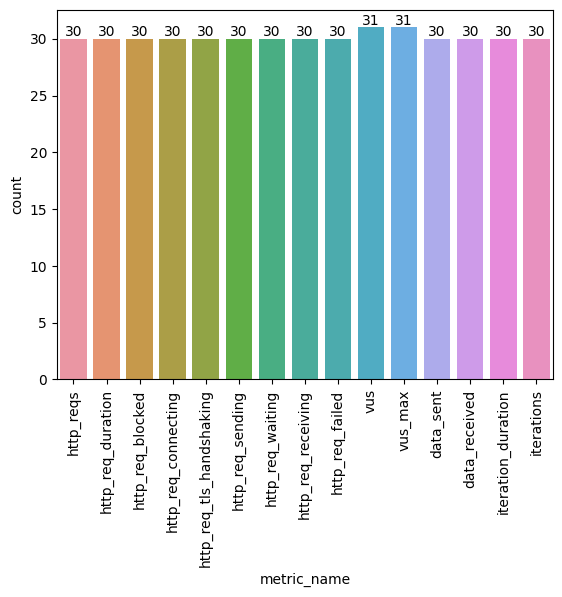

In [23]:
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])


In [24]:
df.shape

(452, 19)

In [25]:
df_1 = df.loc[(df['metric_name'] == 'http_req_duration')]
df_1.shape


(30, 19)

In [26]:
df_1.head()

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,proto,scenario,service,status,subproto,tls_version,url,extra_tags,metadata
1,http_req_duration,1697272536,402.229346,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
16,http_req_duration,1697272537,20.865608,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
31,http_req_duration,1697272538,19.288991,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
46,http_req_duration,1697272539,20.675645,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
61,http_req_duration,1697272540,26.857638,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN


<Axes: ylabel='metric_value'>

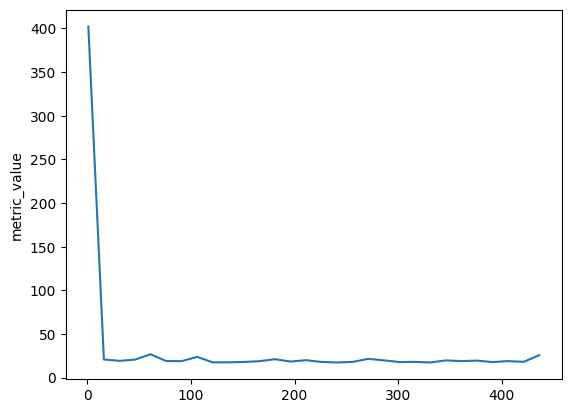

In [27]:
duration = df_1['metric_value']
sns.lineplot(data=duration)

In [28]:
df_1['metric_value'].mean()

32.357805533333334